<a href="https://colab.research.google.com/github/Pikcolo/predict_stroke/blob/main/Stroke_Prediction__SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data and Cleaning Data

In [354]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [355]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [357]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [358]:
df_cleaned = df.drop(columns=["id","ever_married","work_type","Residence_type"])
df_cleaned["bmi"] = df_cleaned["bmi"].fillna(df["bmi"].median())
df_cleaned.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,28.1,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


In [359]:
df_cleaned.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
smoking_status,0
stroke,0


In [360]:
df_cleaned.to_csv("stroke_data_cleaned.csv", index=False)

In [361]:
df_cleaned.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [362]:
df_cleaned.drop(df_cleaned[df_cleaned.gender == 'Other'].index,inplace=True)
df_cleaned.reset_index(drop=True,inplace=True)

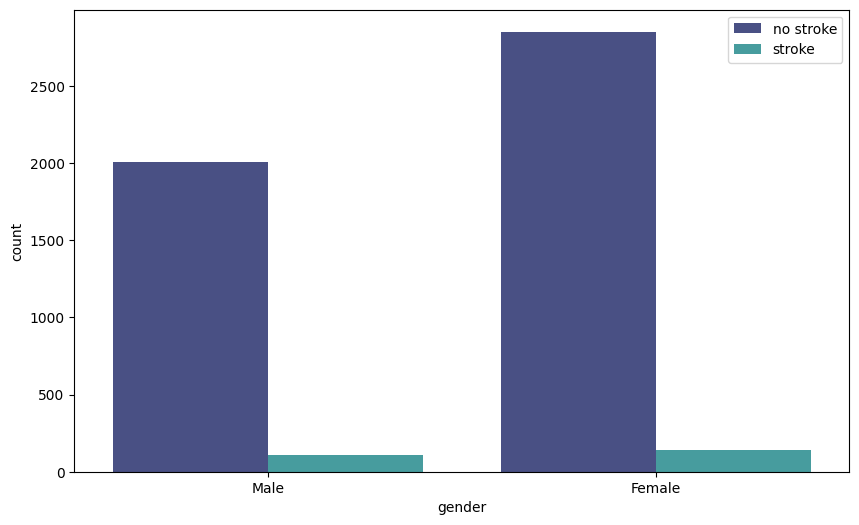

In [363]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df_cleaned, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

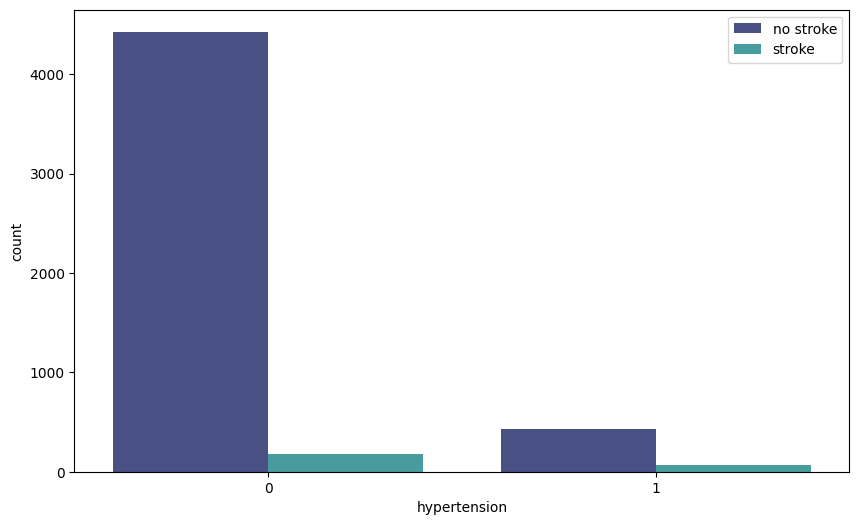

In [364]:
plt.figure(figsize=(10,6))
sns.countplot(x="hypertension", data=df_cleaned, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

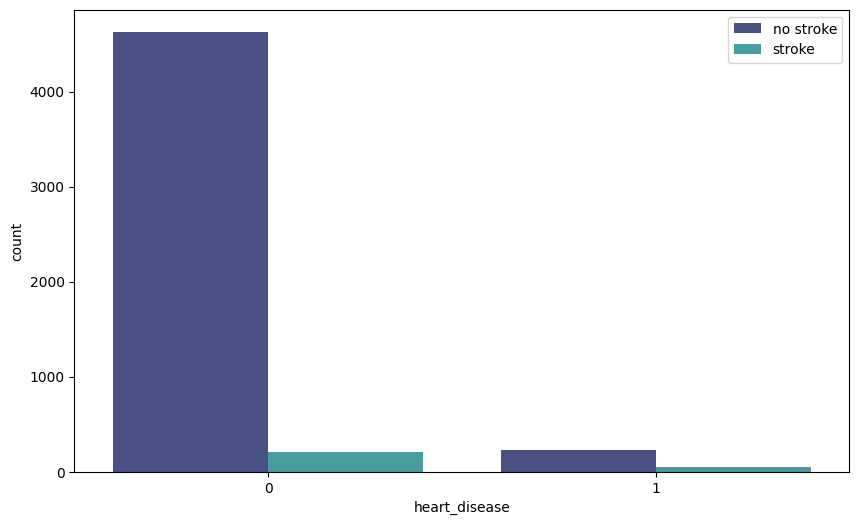

In [365]:
plt.figure(figsize=(10,6))
sns.countplot(x="heart_disease", data=df_cleaned, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [366]:
df_cleaned.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


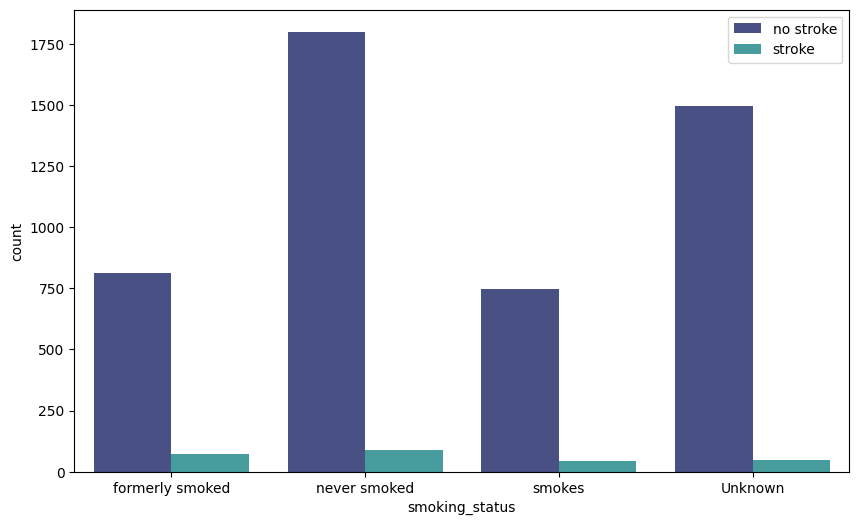

In [367]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df_cleaned, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [368]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# อ่านข้อมูล
new_df = pd.read_csv("stroke_data_cleaned.csv")

# แสดงข้อมูลก่อนทำการ clean
print("Before Cleaning:")
print(new_df[['gender', 'smoking_status', 'stroke']].head())

# แทนที่ 'Unknown' ใน smoking_status ตามค่า stroke
def replace_unknown_by_stroke_status(row):
    if row['smoking_status'] == 'Unknown':
        if row['stroke'] == 1:
            return 'smokes'  # หรือ 'formerly smoked' ขึ้นอยู่กับสมมติฐานของคุณ
        else:
            return 'never smoked'
    return row['smoking_status']

# แทนที่ 'Other' ใน gender ตามค่า stroke
def replace_other_by_stroke_status(row):
    if row['gender'] == 'Other':
        if row['stroke'] == 1:
            return 'Male'  # หรือ 'Female' ขึ้นอยู่กับสมมติฐานของคุณ
        else:
            return 'Female'
    return row['gender']

# ใช้ฟังก์ชันในการแทนที่ค่า 'Unknown' และ 'Other'
new_df['smoking_status'] = new_df.apply(replace_unknown_by_stroke_status, axis=1)
new_df['gender'] = new_df.apply(replace_other_by_stroke_status, axis=1)

# แปลงข้อมูลที่เป็น string ให้เป็นตัวเลข
label_encoders = {}
for col in ["gender", "smoking_status"]:
    le = LabelEncoder()

    # แปลงข้อมูลให้เป็นตัวเลข
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le

    print(f"\nMapping for {col}:")
    for i, label in enumerate(le.classes_):
        print(f"{label} -> {i}")
    print()

# ตรวจสอบผลลัพธ์
print("\nFinal Data:")
print(new_df[['gender', 'smoking_status', 'stroke']].head())


Before Cleaning:
   gender   smoking_status  stroke
0    Male  formerly smoked       1
1  Female     never smoked       1
2    Male     never smoked       1
3  Female           smokes       1
4  Female     never smoked       1

Mapping for gender:
Female -> 0
Male -> 1


Mapping for smoking_status:
formerly smoked -> 0
never smoked -> 1
smokes -> 2


Final Data:
   gender  smoking_status  stroke
0       1               0       1
1       0               1       1
2       1               1       1
3       0               2       1
4       0               1       1


([<matplotlib.patches.Wedge at 0x7c995479ed50>,
 [Text(-1.3836278213372577, 0.21348080012383747, 'No Stroke'),
  Text(1.185966701861844, -0.18298355684306683, 'Stroke')],
 [Text(-0.8894750280025228, 0.13723765722246695, '95.1%'),
  Text(0.691813909419409, -0.10674040815845563, '4.9%')])

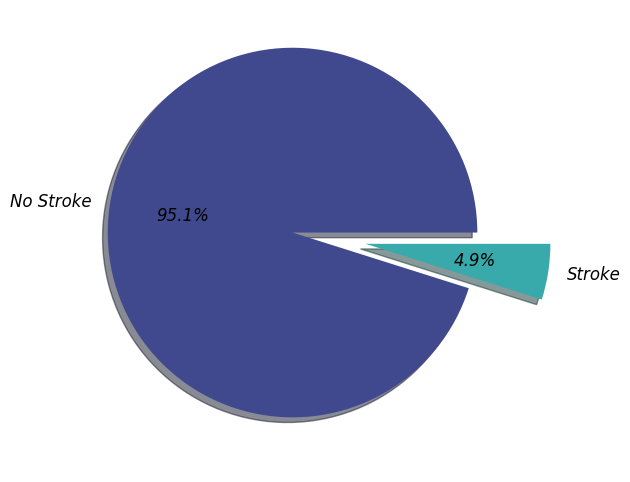

In [369]:
plt.figure(figsize=(10,6))
plt.pie(new_df.stroke.value_counts(),labels=['No Stroke','Stroke'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [370]:
new_df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,0,1
1,0,61.0,0,0,202.21,28.1,1,1
2,1,80.0,0,1,105.92,32.5,1,1
3,0,49.0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,28.1,1,0
5106,0,81.0,0,0,125.20,40.0,1,0
5107,0,35.0,0,0,82.99,30.6,1,0
5108,1,51.0,0,0,166.29,25.6,0,0


# Data Preprocessing

## Oversampling Data ด้วย SMOTE

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import joblib

# แยก features (X) และ target (y)
X = new_df.drop('stroke', axis=1)
y = new_df['stroke']

# แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class Distribution Before Resampling:")
print(np.bincount(y_train))  # ตรวจสอบ class imbalance
print(np.bincount(y_test))

# ✅ ใช้ SMOTE เพื่อ Balance Class
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # ปรับค่า sampling_strategy ตามต้องการ
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:")
print(np.bincount(y_train))  # ตรวจสอบ class distribution ใหม่

# ✅ Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ คำนวณ class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights_dict)

# ✅ บันทึก Scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler has been saved!")

Class Distribution Before Resampling:
[3889  199]
[972  50]
Class Distribution After SMOTE:
[3889 1944]
Class Weights: {0: 0.7499357161223965, 1: 1.5002572016460904}
Scaler has been saved!


In [372]:
# ✅ ปรับโมเดลให้เล็กลงเพื่อลด overfitting
model = Sequential([
    Dense(units=256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.4),
    Dense(units=128, activation='relu'),
    Dropout(0.4),
    Dense(units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=32, activation='relu'),
    Dropout(0.4),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

In [373]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ✅ เทรนโมเดลพร้อมใช้ class_weights
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    class_weight=class_weights_dict,  # ใช้ class weight
    callbacks=[early_stopping]
)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6031 - loss: 0.6270 - val_accuracy: 0.7055 - val_loss: 0.4715
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7608 - loss: 0.4639 - val_accuracy: 0.6673 - val_loss: 0.4404
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7470 - loss: 0.4582 - val_accuracy: 0.7182 - val_loss: 0.4135
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7608 - loss: 0.4476 - val_accuracy: 0.7270 - val_loss: 0.4169
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7728 - loss: 0.4305 - val_accuracy: 0.7094 - val_loss: 0.4327
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7788 - loss: 0.4278 - val_accuracy: 0.7153 - val_loss: 0.3967
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.4242 - val_accuracy: 0.7260 - val_loss: 0.4076
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.4258 - val_accuracy: 0.7368 - v

## learning curve จากวิธีการ Oversamping ด้วย SMOTE

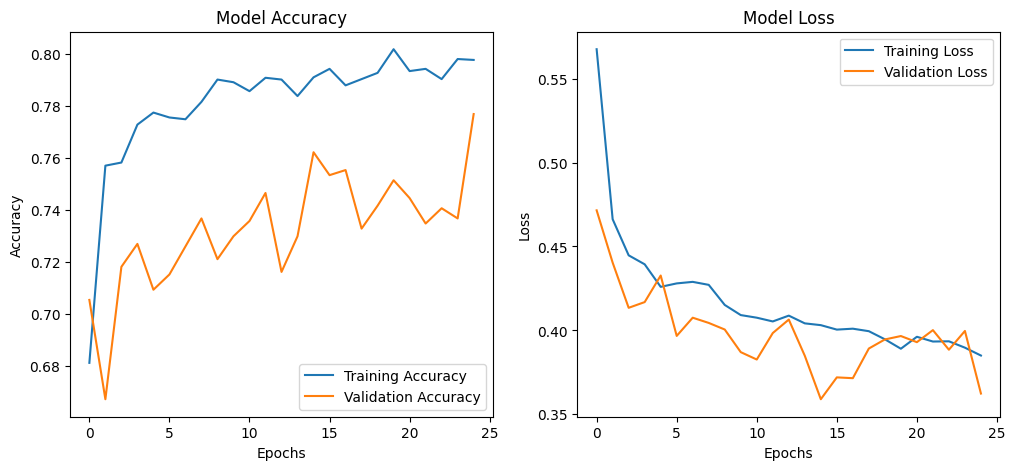

In [374]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [375]:
# ประเมินผล
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

32/32 - 0s - 4ms/step - accuracy: 0.7622 - loss: 0.3590
Test accuracy: 76.22%


## Confusion matrix จากวิธีการ Oversamping ด้วย SMOTE

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


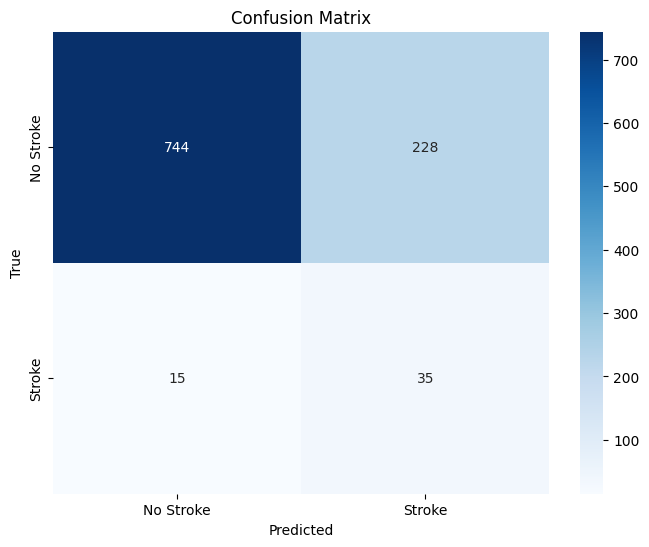

Accuracy: 76.22%
Precision: 13.31%
Recall: 70.00%
F1 Score: 22.36%


In [376]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ทำนายค่าบนข้อมูล test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # แปลงผลลัพธ์จาก sigmoid เป็น 0 หรือ 1

# คำนวณ confusion matrix
cm = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix ด้วย heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# คำนวณค่าต่าง ๆ จาก confusion matrix
tn, fp, fn, tp = cm.ravel()

accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Save Model

In [377]:
# Save the entire model
model.save("stroke_prediction_model.h5")

# เอาโมเดลไปลองใช้

## แบบ SMOTE

In [378]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

# โหลดโมเดลที่บันทึกไว้
loaded_model = load_model('stroke_prediction_model.h5')

# ตรวจสอบว่าโหลดโมเดลสำเร็จ
loaded_model.summary()

# สร้างตัวอย่างข้อมูลใหม่
sample_data = np.array([
    [1, 67.0, 0, 1, 228.69, 36.6, 1],  # ตัวอย่างที่ 1 (stroke)
    [0, 61.0, 0, 0, 202.21, 28.1, 1],  # ตัวอย่างที่ 2 (stroke)
    [1, 80.0, 0, 1, 105.92, 32.5, 1],  # ตัวอย่างที่ 3 (stroke)
    [0, 49.0, 0, 0, 171.23, 34.4, 0],  # ตัวอย่างที่ 4 (stroke)
    [0, 79.0, 1, 0, 174.12, 24.0, 2],  # ตัวอย่างที่ 5 (stroke)
    [1, 25.0, 0, 0, 85.3, 22.1, 2],   # ตัวอย่างที่ 6 (no stroke)
    [0, 30.0, 0, 0, 90.5, 23.4, 1],   # ตัวอย่างที่ 7 (no stroke)
    [1, 35.0, 0, 0, 95.2, 24.8, 2],   # ตัวอย่างที่ 8 (no stroke)
    [0, 28.0, 0, 0, 80.1, 21.5, 0],   # ตัวอย่างที่ 9 (no stroke)
    [1, 40.0, 0, 0, 88.7, 22.9, 2],   # ตัวอย่างที่ 10 (no stroke)
])


# โหลดตัวแปลง scaler ที่ใช้กับข้อมูล training
scaler = joblib.load('scaler.pkl')

# ทำ Standardization ด้วยตัวแปลงที่เคยใช้กับ training data
sample_data = scaler.transform(sample_data)

# ทำนายผลจากโมเดลที่โหลด
predictions = loaded_model.predict(sample_data)

# แปลงการทำนายเป็นเปอร์เซ็นต์
predictions_percent = predictions * 100

# แสดงผลการทำนาย
for i, prob in enumerate(predictions_percent):
    print(f"ตัวอย่างที่ {i+1}: โอกาสเป็นโรคหลอดเลือดสมอง {prob[0]:.2f}%")

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,827 (179.02 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ตัวอย่างที่ 1: โอกาสเป็นโรคหลอดเลือดสมอง 63.33%
ตัวอย่างที่ 2: โอกาสเป็นโรคหลอดเลือดสมอง 71.27%
ตัวอย่างที่ 3: โอกาสเป็นโรคหลอดเลือดสมอง 38.05%
ตัวอย่างที่ 4: โอกาสเป็นโรคหลอดเลือดสมอง 65.75%
ตัวอย่างที่ 5: โอกาสเป็นโรคหลอดเลือดสมอง 59.14%
ตัวอย่างที่ 6: โอกาสเป็นโรคหลอดเลือดสมอง 0.00%
ตัวอย่างที่ 7: โอกาสเป็นโรคหลอดเลือดสมอง 0.61%
ตัวอย่างที่ 8: โอกาสเป็นโรคหลอดเลือดสมอง 0.05%
ตัวอย่างที่ 9: โอกาสเป็นโรคหลอดเลือดสมอง 4.83%
ตัวอย่างที่ 10: โอกาสเป็นโรคหลอดเลือดสมอง 0.05%
